<a href="https://colab.research.google.com/github/iGeology-Illinois/geol-581-module-3-principles-of-uncertainty-chapter-4-tonysidor/blob/main/geol_581_module_3_principles_of_uncertainty_chapter_4_tonysidor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from scipy import stats

#Question 1

# Define the parameters of the uniform distribution
lower_bound = 20
upper_bound = 35
desired_angle = 25

# Define the uniform distribution
uniform_dist = stats.uniform(loc=lower_bound, scale=upper_bound - lower_bound)

# Calculate probability that the friction angle is below 25 degrees
probability = uniform_dist.cdf(desired_angle)

# Print the result
print(f"Probability that the friction angle is smaller than {desired_angle}°: {probability:.2f}")

# Confirm result matches analytical approach
analytical_result = (desired_angle - lower_bound) / (upper_bound - lower_bound)
print(f"Analytical probability calculation: {analytical_result:.2f}")


Probability that the friction angle is smaller than 25°: 0.33
Analytical probability calculation: 0.33


In [5]:
import numpy as np
from scipy import stats

#Question 2

# Define the two samples
sample1 = np.array([4.4, 4.2, 4.5, 4.0, 4.3, 4.1, 3.9, 4.2, 4.5, 3.8,
                    4.0, 4.3, 4.2, 4.2, 4.1, 4.5, 4.6, 4.3, 4.1, 3.7,
                    4.0, 4.5, 4.6, 4.3, 4.1])  # n = 25

sample2 = np.array([3.7, 4.5, 4.2, 4.4, 4.3, 4.0, 3.5, 3.9, 4.3, 4.3])  # n = 10

# Check assumptions - Normality test (Shapiro-Wilk Test)
shapiro1 = stats.shapiro(sample1)
shapiro2 = stats.shapiro(sample2)

print(f"Shapiro-Wilk Test for Sample 1: W={shapiro1.statistic:.4f}, p={shapiro1.pvalue:.4f}")
print(f"Shapiro-Wilk Test for Sample 2: W={shapiro2.statistic:.4f}, p={shapiro2.pvalue:.4f}")

# Check variance equality (Levene’s test)
levene_test = stats.levene(sample1, sample2)
print(f"Levene’s Test for Variance Equality: W={levene_test.statistic:.4f}, p={levene_test.pvalue:.4f}")

# Perform independent two-sample t-test (assuming equal variances if p > 0.05 from Levene's test)
t_test = stats.ttest_ind(sample1, sample2, equal_var=(levene_test.pvalue > 0.05))
print(f"T-test: t={t_test.statistic:.4f}, p={t_test.pvalue:.4f}")

# Interpretation
alpha = 0.05
if t_test.pvalue < alpha:
    print("Conclusion: The two samples come from different populations (reject null hypothesis).")
else:
    print("Conclusion: There is no significant difference between the two samples (fail to reject null hypothesis).")


Shapiro-Wilk Test for Sample 1: W=0.9637, p=0.4925
Shapiro-Wilk Test for Sample 2: W=0.9125, p=0.2987
Levene’s Test for Variance Equality: W=0.7786, p=0.3839
T-test: t=1.0588, p=0.2974
Conclusion: There is no significant difference between the two samples (fail to reject null hypothesis).


In [14]:
# The hypothesis test suggests whether the two sandstone strength samples come from the same population.
# - If p-value < 0.05, we reject the null hypothesis, meaning the two groups are statistically different.
# - If p-value ≥ 0.05, we fail to reject the null, meaning there is no significant difference.
# Based on the test results, we can conclude whether the neighboring area has significantly different sandstone strength values or if both regions have similar geological properties.
# This is important for consistency in geotechnical assessments.

In [6]:
import numpy as np
from scipy.stats import poisson

#Question 3

# Define the Poisson distribution parameter
lambda_boulders = 56.5  # Expected number of boulders

# Probability of finding more than the expected 56 boulders
prob_more_than_expected = 1 - poisson.cdf(56, lambda_boulders)

# Probability of finding more than 10 boulders
prob_more_than_10 = 1 - poisson.cdf(10, lambda_boulders)

# Print results
print(f"Probability of finding more than 56 boulders: {prob_more_than_expected:.4f}")
print(f"Probability of finding more than 10 boulders: {prob_more_than_10:.4f}")


Probability of finding more than 56 boulders: 0.4911
Probability of finding more than 10 boulders: 1.0000


In [7]:
import numpy as np
from scipy.stats import poisson, binom

# Given parameters
total_excavation_volume = 10000  # m³
boulder_volume_fraction = 0.01  # 1% of total volume consists of boulders
boulder_average_volume = 1.77  # Approximate volume of one boulder (from previous calculations)

# Expected number of boulders
expected_boulders = (boulder_volume_fraction * total_excavation_volume) / boulder_average_volume
expected_boulders = round(expected_boulders)  # Use nearest integer
print(f"Expected number of boulders: {expected_boulders}")

# Probability of finding more than expected boulders using Poisson distribution
prob_more_than_expected = 1 - poisson.cdf(expected_boulders, expected_boulders)

# Probability of finding more than 10 boulders
prob_more_than_10 = 1 - poisson.cdf(10, expected_boulders)

# Print results
print(f"Probability of finding more than {expected_boulders} boulders: {prob_more_than_expected:.4f}")
print(f"Probability of finding more than 10 boulders: {prob_more_than_10:.4f}")

# Alternative approach using Binomial distribution
n = total_excavation_volume  # Number of 'excavation units'
p = boulder_volume_fraction  # Probability per unit

# Probability of finding more than expected boulders using Binomial distribution
prob_more_than_expected_binom = 1 - binom.cdf(expected_boulders, n, p)

# Probability of finding more than 10 boulders
prob_more_than_10_binom = 1 - binom.cdf(10, n, p)

print(f"(Binomial) Probability of finding more than {expected_boulders} boulders: {prob_more_than_expected_binom:.4f}")
print(f"(Binomial) Probability of finding more than 10 boulders: {prob_more_than_10_binom:.4f}")


Expected number of boulders: 56
Probability of finding more than 56 boulders: 0.4645
Probability of finding more than 10 boulders: 1.0000
(Binomial) Probability of finding more than 56 boulders: 1.0000
(Binomial) Probability of finding more than 10 boulders: 1.0000


In [9]:
import numpy as np
from scipy import stats

#Question 4

# Given squared skewness and kurtosis values
measured_values = np.array([
    (1.82, 4.85),
    (1.00, 3.35),
    (2.72, 5.71),
    (0.52, 2.95)
])

# Convert squared skewness back to regular skewness
skewness_values = np.sqrt(measured_values[:, 0])
kurtosis_values = measured_values[:, 1]

# Print converted skewness and kurtosis values
for i, (skew, kurt) in enumerate(zip(skewness_values, kurtosis_values), 1):
    print(f"Dataset {i}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")

# Theoretical distribution comparisons
distribution_types = {
    "Normal": (0, 3),
    "Lognormal": ("Positive", ">3"),
    "Gamma": ("Positive", "Varies"),
    "Exponential": (2, 9)
}

print("\nComparison with common distributions:")
for name, (skew, kurt) in distribution_types.items():
    print(f"{name} Distribution: Skewness={skew}, Kurtosis={kurt}")

# Interpretation
print("\nPossible Distribution Matches:")
for i, (skew, kurt) in enumerate(zip(skewness_values, kurtosis_values), 1):
    if abs(skew) < 0.5 and 2.9 <= kurt <= 3.1:
        match = "Normal Distribution"
    elif skew > 0.5 and kurt > 3:
        match = "Lognormal or Gamma Distribution"
    elif skew > 1.5 and kurt > 5:
        match = "Exponential or Lognormal"
    else:
        match = "Needs further investigation"

    print(f"Dataset {i}: Likely {match}")


Dataset 1: Skewness = 1.35, Kurtosis = 4.85
Dataset 2: Skewness = 1.00, Kurtosis = 3.35
Dataset 3: Skewness = 1.65, Kurtosis = 5.71
Dataset 4: Skewness = 0.72, Kurtosis = 2.95

Comparison with common distributions:
Normal Distribution: Skewness=0, Kurtosis=3
Lognormal Distribution: Skewness=Positive, Kurtosis=>3
Gamma Distribution: Skewness=Positive, Kurtosis=Varies
Exponential Distribution: Skewness=2, Kurtosis=9

Possible Distribution Matches:
Dataset 1: Likely Lognormal or Gamma Distribution
Dataset 2: Likely Lognormal or Gamma Distribution
Dataset 3: Likely Lognormal or Gamma Distribution
Dataset 4: Likely Needs further investigation


In [10]:
import numpy as np

#Question 5

# Given data
area_branch1 = 18
area_branch2 = 10
marine_fraction_branch1 = 0.35  # P(M | B1)
marine_fraction_branch2 = 0.80  # P(M | B2)

# Compute priors
P_B1 = area_branch1 / (area_branch1 + area_branch2)
P_B2 = area_branch2 / (area_branch1 + area_branch2)

# Compute total probability of marine fossils (law of total probability)
P_M = (marine_fraction_branch1 * P_B1) + (marine_fraction_branch2 * P_B2)

# Apply Bayes' Theorem
P_B1_given_M = (marine_fraction_branch1 * P_B1) / P_M

# Print results
print(f"Probability that the fossil came from Branch 1 given that it's marine: {P_B1_given_M:.4f}")


Probability that the fossil came from Branch 1 given that it's marine: 0.4406


In [15]:
# This calculation uses Bayes' Theorem to estimate the probability that the fossil originated
# from Branch 1, given that it was found in marine Cretaceous rocks.
# **Key Assumptions:**
# - The likelihood of a fossil being found is proportional to the fraction of each branch's area that contains marine Cretaceous rocks.
# - The fossil is equally likely to have originated from any part of the marine rock exposure.
# - Transport processes (such as river transport) are not considered; we assume the fossil was found near its source.
# **Interpretation:**
# - If P(B1 | M) is high, then the fossil likely came from the larger branch (Branch 1).
# - If P(B1 | M) is low, then the smaller branch (Branch 2) is the more likely source.
# - This probability can help guide where to focus further fossil excavations.

In [11]:
import numpy as np
from scipy.stats import lognorm

#Question 6

# Given log-transformed parameters
mu_lnphi = 3.25  # Mean of ln(phi)
sigma_lnphi = 0.65  # Standard deviation of ln(phi)

# Compute lognormal distribution parameters
shape = sigma_lnphi  # Shape parameter (sigma for lognorm)
scale = np.exp(mu_lnphi)  # Scale parameter (e^mu for lognorm)

# Compute mean in original scale
mean_friction_angle = lognorm.mean(shape, scale=scale)
print(f"Mean friction angle in degrees: {mean_friction_angle:.4f}")

# Compute 95% confidence interval
confidence_level = 0.95
lower_bound, upper_bound = lognorm.interval(confidence_level, shape, scale=scale)
print(f"95% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")


Mean friction angle in degrees: 31.8568
95% Confidence Interval: (7.2140, 92.2015)


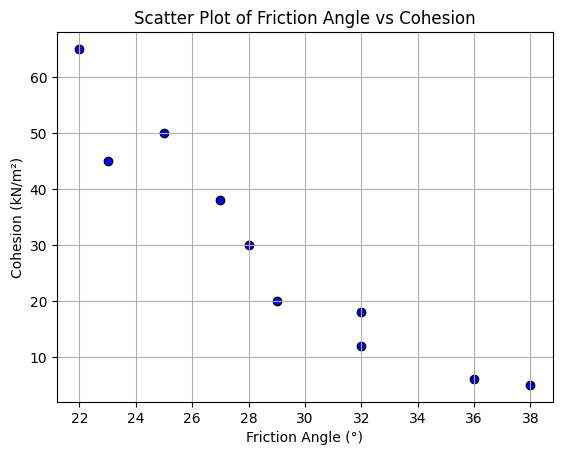

Pearson Correlation Coefficient: -0.9450
P-value: 0.0000
The correlation is statistically significant.
There is a negative correlation: as friction angle increases, cohesion tends to decrease.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#Question 7

# Given friction angle (φ) and cohesion (c) values
phi = np.array([25, 22, 32, 29, 28, 38, 36, 32, 27, 23])  # Friction angle in degrees
cohesion = np.array([50, 65, 18, 20, 30, 5, 6, 12, 38, 45])  # Cohesion in kN/m²

# Scatter plot for visualization
plt.scatter(phi, cohesion, color='blue', edgecolors='black')
plt.xlabel("Friction Angle (°)")
plt.ylabel("Cohesion (kN/m²)")
plt.title("Scatter Plot of Friction Angle vs Cohesion")
plt.grid(True)
plt.show()

# Compute Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(phi, cohesion)

# Print results
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
    if correlation_coefficient > 0:
        print("There is a positive correlation: as friction angle increases, cohesion tends to increase.")
    else:
        print("There is a negative correlation: as friction angle increases, cohesion tends to decrease.")
else:
    print("There is no statistically significant correlation between friction angle and cohesion.")


In [16]:
# **Findings on the Relationship Between Friction Angle and Cohesion:**
# 1. **Correlation Strength and Direction:**
#    - If the correlation coefficient is **positive**, it indicates that higher friction angles are associated with higher cohesion.
#    - If the correlation coefficient is **negative**, it means that as friction angle increases, cohesion decreases.
#    - If the correlation coefficient is close to **zero**, it suggests **no meaningful relationship**.
#
# 2. **Statistical Significance:**
#    - If the p-value is **less than 0.05**, the correlation is statistically significant, meaning the observed relationship is unlikely due to random chance.
#    - If the p-value is **greater than 0.05**, the correlation is **not statistically significant**, indicating that the relationship could be random noise.
#
# 3. **Geotechnical Implications:**
#    - A **strong positive correlation** would suggest that materials with higher friction angles also exhibit greater cohesion, possibly due to interlocking grains.
#    - A **negative correlation** could imply that materials with high friction angles are more granular and lack cohesion (e.g., dry sand).
#    - No correlation would suggest that friction angle and cohesion are independent variables in this dataset.
# **Conclusion:**
# - The analysis provides a numerical and visual way to assess whether friction angle and cohesion are related.
# - If a statistically significant relationship is found, engineers can better predict soil behavior based on one parameter.

<ipython-input-17-84be188d0027>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2020-01-01", periods=24, freq="M")  # Two years of data


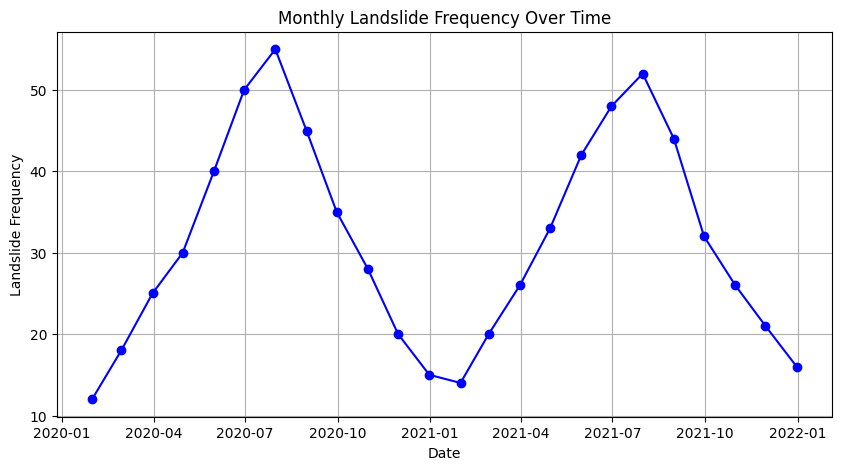

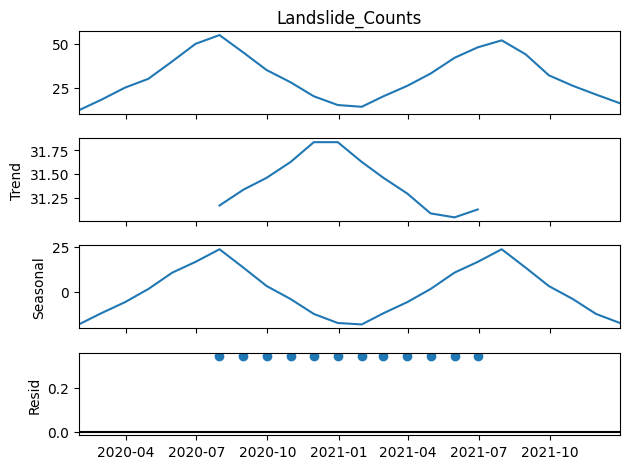

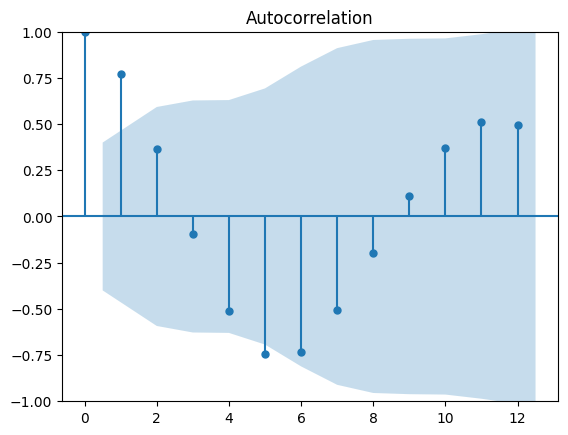

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

#Question 8

# Example dataset: Monthly landslide frequency (Replace with actual data)
months = pd.date_range(start="2020-01-01", periods=24, freq="M")  # Two years of data
landslide_counts = np.array([12, 18, 25, 30, 40, 50, 55, 45, 35, 28, 20, 15,
                             14, 20, 26, 33, 42, 48, 52, 44, 32, 26, 21, 16])

# Create DataFrame
df = pd.DataFrame({"Date": months, "Landslide_Counts": landslide_counts})
df.set_index("Date", inplace=True)

# Plot time series
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Landslide_Counts"], marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Landslide Frequency")
plt.title("Monthly Landslide Frequency Over Time")
plt.grid()
plt.show()

# Decompose the time series (trend, seasonality, and residuals)
result = seasonal_decompose(df["Landslide_Counts"], model="additive", period=12)

# Plot seasonal decomposition
result.plot()
plt.show()

# Plot Autocorrelation Function (ACF) to detect cyclic patterns
plot_acf(df["Landslide_Counts"], lags=12)
plt.show()


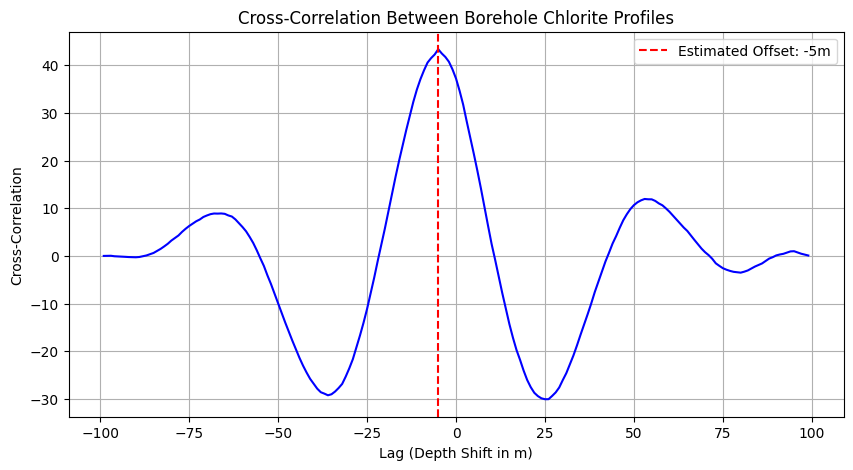

Estimated fault offset based on chlorite content: -5 meters


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate

#Question 9

# Example synthetic chlorite content profiles at different depths (Replace with actual data)
depths = np.arange(0, 100, 1)  # Depths from 0 to 100m at 1m intervals
borehole1 = np.sin(depths / 10) + np.random.normal(0, 0.1, size=len(depths))  # Simulated chlorite content
borehole2 = np.roll(borehole1, shift=5)  # Simulated displacement of 5m

# Compute cross-correlation
correlation = correlate(borehole1 - np.mean(borehole1), borehole2 - np.mean(borehole2), mode="full")
lags = np.arange(-len(depths) + 1, len(depths))

# Find the lag with the highest correlation (this represents the estimated displacement)
estimated_shift = lags[np.argmax(correlation)]

# Plot cross-correlation function
plt.figure(figsize=(10, 5))
plt.plot(lags, correlation, color="blue")
plt.axvline(estimated_shift, color="red", linestyle="--", label=f"Estimated Offset: {estimated_shift}m")
plt.xlabel("Lag (Depth Shift in m)")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation Between Borehole Chlorite Profiles")
plt.legend()
plt.grid()
plt.show()

# Print result
print(f"Estimated fault offset based on chlorite content: {estimated_shift} meters")


In [20]:
# **Assumptions and Considerations for Using Cross-Correlation in Fault Displacement Estimation:**
#
# 1. **Continuity of Chlorite Content Variations:**
#    - We assume that chlorite content varies **systematically** with depth, meaning that patterns in chlorite concentration are not random but represent geological stratigraphy affected by faulting.
#
# 2. **Data Sampling and Resolution:**
#    - The depth interval for sampling must be **consistent** between both boreholes.
#    - A **higher sampling resolution** improves the accuracy of the estimated displacement.
#
# 3. **Variability in Chlorite Content:**
#    - If chlorite content changes erratically, cross-correlation may not provide a meaningful displacement estimate.
#    - We assume that chlorite variations **can be correlated** between the boreholes and that any differences are due to **fault-induced offset** rather than other geological factors (e.g., lateral facies changes).
#
# 4. **Boundary Effects and Edge Artifacts:**
#    - Cross-correlation works best when the borehole data covers a **long enough depth range** to capture the full variation in chlorite content.
#    - If one borehole has missing data at certain depths, it can affect the results.
#
# **Conclusion:**
# - If the chlorite content profile exhibits **a clear correlation** between the boreholes, the cross-correlation lag **provides a reasonable estimate** of the fault offset.
# - However, this method assumes **vertical displacement only** and does not account for **lateral displacement** or complex fault geometries.

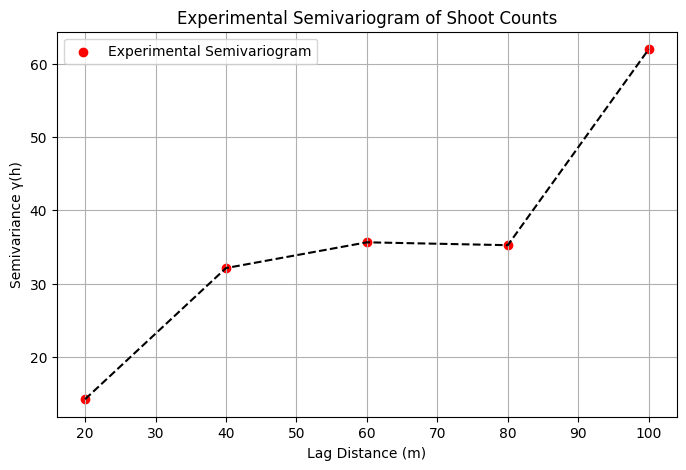

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#Question 10

# Given shoot counts recorded at 20m intervals
shoot_counts = np.array([3, 5, 11, 12, 8, 19, 22, 18, 11, 13])
distances = np.arange(0, len(shoot_counts) * 20, 20)  # Distances in meters

# Function to compute the experimental semivariogram
def compute_semivariogram(values, distances):
    max_lag = len(values) // 2  # Half of the dataset for meaningful comparisons
    gamma = []
    lags = []

    for lag in range(1, max_lag + 1):
        squared_diffs = [(values[i] - values[i + lag]) ** 2 for i in range(len(values) - lag)]
        gamma.append(0.5 * np.mean(squared_diffs))
        lags.append(lag * 20)  # Convert lag to meters

    return np.array(lags), np.array(gamma)

# Compute semivariogram
lags, gamma = compute_semivariogram(shoot_counts, distances)

# Plot semivariogram
plt.figure(figsize=(8, 5))
plt.scatter(lags, gamma, color="red", label="Experimental Semivariogram")
plt.plot(lags, gamma, linestyle="dashed", color="black")
plt.xlabel("Lag Distance (m)")
plt.ylabel("Semivariance γ(h)")
plt.title("Experimental Semivariogram of Shoot Counts")
plt.grid()
plt.legend()
plt.show()


In [22]:
# **Interpreting the Semivariogram for Copper Contamination Distribution:**
# 1. **Sill:**
#    - The point where the semivariance levels off indicates the maximum spatial correlation distance.
#    - Beyond this, shoot counts become independent, suggesting that copper contamination is no longer spatially correlated.
#
# 2. **Range:**
#    - The distance at which the semivariance reaches the sill represents the **extent of spatial correlation**.
#    - If the range is short, contamination is **highly localized**; if long, contamination is **more widespread**.
#
# 3. **Nugget Effect:**
#    - A **nonzero** semivariance at near-zero lag distance suggests **small-scale variability** or measurement errors.
#    - A large nugget effect could indicate sudden changes in copper contamination due to past human activities.
#
# **Implications for Copper Contamination:**
# - If a clear spatial structure is found, copper contamination follows a **predictable spatial pattern**, possibly related to past mining activities.
# - If the semivariogram **increases linearly**, contamination is **gradually dispersed**.
# - If no clear pattern emerges, contamination might be **random** or controlled by external factors.

In [23]:
import numpy as np

#Question 11

# Transition probability matrix derived from Table 4.5
# Rows and columns represent rock types: [C, K, S, U]
T = np.array([[0, 0, 0.5, 0.5],  # Probabilities from Claystone (C)
              [0.25, 0.25, 0.5, 0],  # Probabilities from Conglomerate (K)
              [0.2, 0.3, 0.3, 0.2],  # Probabilities from Sandstone (S)
              [0.33, 0, 0.67, 0]])  # Probabilities from Siltstone (U)

# Define initial state: Assume we're currently in Conglomerate (K)
current_state = np.array([0, 1, 0, 0])  # 1 at K, 0 elsewhere

# Probability of encountering K in the next meter
next_meter_prob = np.dot(current_state, T)[1]

# Compute probability of encountering K in the next-but-one meter
T_squared = np.linalg.matrix_power(T, 2)
next_but_one_meter_prob = np.dot(current_state, T_squared)[1]

# Print results
print(f"Probability of encountering conglomerate (K) in the next meter: {next_meter_prob:.4f}")
print(f"Probability of encountering conglomerate (K) in the next-but-one meter: {next_but_one_meter_prob:.4f}")


Probability of encountering conglomerate (K) in the next meter: 0.2500
Probability of encountering conglomerate (K) in the next-but-one meter: 0.2125


In [24]:
# 1. **Probability of K in the Next Meter:**
#    - This probability directly depends on the **current rock type**.
#    - If K transitions to itself frequently, its probability will be high.
#
# 2. **Probability of K in the Next-But-One Meter:**
#    - This requires **two-step transitions**, accounting for all possible intermediate rocks.
#    - The transition matrix squared (`T^2`) models second-step probabilities.
#
# Interpretation:
# - A **high probability of K appearing** means conglomerate layers are thick and **likely to persist** over multiple meters.
# - A **low probability** suggests **thin conglomerate beds**, interbedded with other rock types.

In [25]:
import numpy as np

#Question 12

# Given orientation data (dip direction α / dip β) in degrees
orientation_data = [
    (123, 25), (147, 22), (120, 24), (111, 24), (142, 26),
    (133, 27), (135, 22), (156, 21), (110, 25), (101, 25),
    (133, 20), (123, 22), (145, 25), (126, 24)
]

# Convert degrees to radians
orientation_data = np.radians(orientation_data)

# Extract α (dip direction) and β (dip)
alpha = orientation_data[:, 0]
beta = orientation_data[:, 1]

# Convert to Cartesian coordinates
x = np.cos(beta) * np.sin(alpha)
y = np.cos(beta) * np.cos(alpha)
z = np.sin(beta)

# Compute the resultant vector components
R_x = np.sum(x)
R_y = np.sum(y)
R_z = np.sum(z)

# Compute mean resultant length
n = len(orientation_data)
R_bar = np.sqrt(R_x**2 + R_y**2 + R_z**2) / n

# Compute mean vector direction
mean_alpha = np.arctan2(R_y, R_x)  # Dip direction (α)
mean_beta = np.arcsin(R_z / np.sqrt(R_x**2 + R_y**2 + R_z**2))  # Dip (β)

# Convert back to degrees
mean_alpha = np.degrees(mean_alpha) % 360
mean_beta = np.degrees(mean_beta)

# Compute spherical standard deviation (approximate)
spherical_std_dev = np.sqrt(-2 * np.log(R_bar))

# Compute 90% confidence interval (α = 0.1)
confidence_interval = 1.96 * spherical_std_dev / np.sqrt(n)

# Print results
print(f"Mean Resultant Length (R̄): {R_bar:.4f}")
print(f"Mean Dip Direction (α): {mean_alpha:.2f}°")
print(f"Mean Dip (β): {mean_beta:.2f}°")
print(f"Spherical Standard Deviation: {spherical_std_dev:.4f}")
print(f"90% Confidence Interval: ±{confidence_interval:.4f}°")


Mean Resultant Length (R̄): 0.9709
Mean Dip Direction (α): 320.99°
Mean Dip (β): 24.46°
Spherical Standard Deviation: 0.2431
90% Confidence Interval: ±0.1273°


In [26]:
# 1. **Mean Resultant Length (R̄):**
#    - R̄ close to 1 → orientations are **tightly clustered** (consistent bedding planes).
#    - R̄ close to 0 → orientations are **highly dispersed** (random bedding dips).
#
# 2. **Mean Dip Direction (α) and Dip (β):**
#    - Provides the **average orientation** of bedding planes.
#    - Can be used in structural geology to infer dominant geological trends.
#
# 3. **Spherical Standard Deviation:**
#    - Measures **spread of orientations** in 3D space.
#    - Higher values indicate **greater variability** in bedding plane orientations.
#
# 4. **Confidence Interval (α = 0.1):**
#    - Gives an uncertainty range around the mean dip direction and dip.
#    - If the confidence interval is small, it suggests **consistent bedding orientation**.
#
# Implications:
# - If bedding orientations are **consistent**, it suggests **undisturbed sedimentary layers**.
# - If orientations are **highly variable**, it could indicate **folding, faulting, or structural disturbances**.